In [1]:


import warnings
warnings.filterwarnings(action="ignore")



In [2]:
import time
import numpy as np
import pandas as pd

from numba import jit

from collections import Counter

import seaborn as sns
from matplotlib import pylab as plt

sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
plt.rcParams["figure.figsize"] = (18, 8)

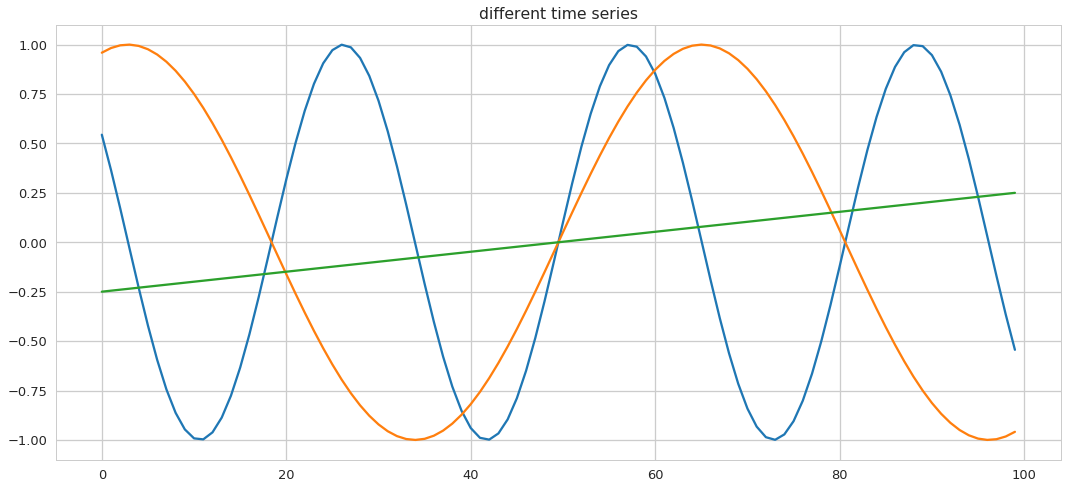

In [4]:


ts1 = np.sin(np.linspace(-10, 10, 100))
ts2 = np.sin(0.5*np.linspace(-10, 10, 100))
ts3 = 0.5*np.linspace(-10, 10, 100)/20
plt.plot(ts1)
plt.plot(ts2)
plt.plot(ts3)
plt.title("different time series")
plt.savefig("some_time_series.png")
plt.show()



In [5]:
def euclidian_distance(ts1, ts2):
    return np.linalg.norm(ts1-ts2)

print("Distance between time series 1 & 2:\t {:.2f}".format(euclidian_distance(ts1, ts2)))
print("Distance between time series 1 & 3:\t {:.2f}".format(euclidian_distance(ts1, ts3)))

Distance between time series 1 & 2:	 11.08
Distance between time series 1 & 3:	 6.79


In [6]:
def compute_accumulated_cost_matrix(A, B, matrix):
    """
    Computes the DTW accumulated cost matrix between
    two time series A and B of the same size.
    """
    assert len(A) == len(B)
    
    n = len(A)
    
    matrix[0, 1:] = np.inf
    matrix[1:, 0] = np.inf
    actual_matrix = matrix[1:, 1:]

    for i in range(n):
        for j in range(n):
            actual_matrix[i, j] = (A[i]- B[j])**2

    for i in range(n):
        for j in range(n):
            actual_matrix[i, j] += min(
                matrix[i, j],
                matrix[i, j+1],
                matrix[i+1, j]
            )

    return actual_matrix

def DTW_distance(ts1, ts2):
    zeros = np.zeros((len(ts1) + 1, len(ts2) + 1))
    M = compute_accumulated_cost_matrix(ts1, ts2, zeros)
    distance = M[-1, -1] / sum(M.shape)
    return distance

In [7]:


%%timeit -n 1000
distance = DTW_distance(ts1, ts2)



24.3 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
print("Distance between time series 1 & 2:\t {:.2f}".format(DTW_distance(ts1, ts2)))
print("Distance between time series 1 & 3:\t {:.2f}".format(DTW_distance(ts1, ts3)))

Distance between time series 1 & 2:	 0.17
Distance between time series 1 & 3:	 0.21


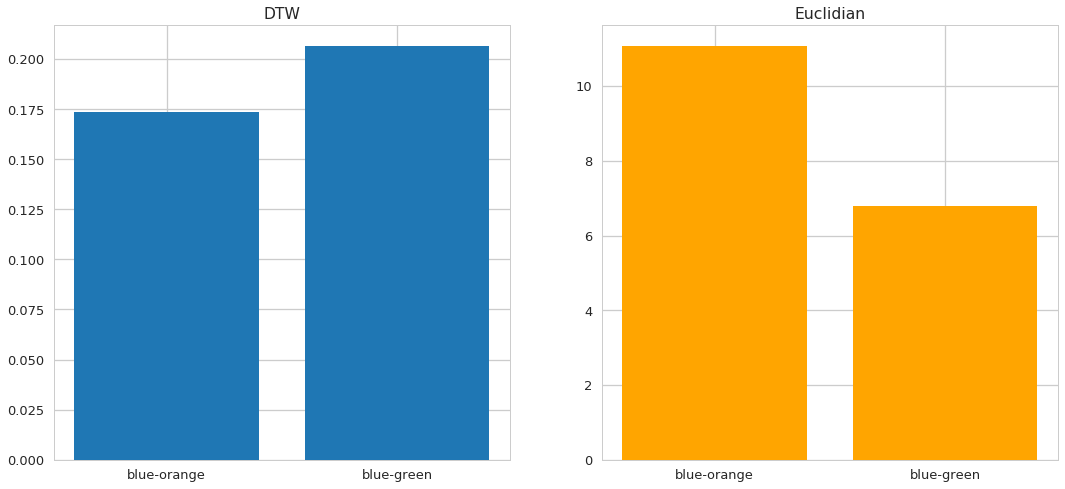

In [9]:
plt.subplot(121)
plt.title("DTW")
plt.bar(np.arange(2), [DTW_distance(ts1, ts2), DTW_distance(ts1, ts3)])
plt.xticks(np.arange(2), ["blue-orange", "blue-green"])
plt.subplot(122)
plt.title("Euclidian")
plt.bar(np.arange(2), [euclidian_distance(ts1, ts2), euclidian_distance(ts1, ts3)], color="orange")
plt.xticks(np.arange(2), ["blue-orange", "blue-green"])
plt.savefig("barplot.png")
plt.show()

In [10]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score



In [21]:
df = pd.read_csv("data.csv")
df.index = df.pop("Unnamed: 0")

df = df.sample(frac=0.1)

y = df.pop("y").values
X = df.values

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1150, 178)
Target shape: (1150,)


In [13]:
df = pd.read_csv("data.csv")

In [14]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [16]:
df.index=df.pop('Unnamed: 0')

In [17]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [18]:
df=df.sample(frac=0.1)

In [19]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
X17.V1.18,18,9,-8,-24,-35,-33,-35,-30,-27,-26,...,8,-2,-6,-20,-33,-40,-40,-35,-28,5
X3.V1.912,-1,3,-1,2,3,-3,-3,-4,0,0,...,30,27,20,10,5,1,-10,-13,-12,3
X23.V1.224,135,134,136,139,142,145,147,147,148,150,...,-98,-173,-267,-431,-556,-645,-662,-648,-569,1
X20.V1.153,15,1,-5,-2,-12,-11,-2,3,13,30,...,-63,-57,-35,-17,-2,-6,-7,-13,-5,2
X9.V1.794,435,196,-129,-478,-776,-953,-967,-866,-722,-592,...,-968,-824,-648,-482,-333,-206,-86,15,106,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, X17.V1.18 to X15.V1.871
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 1.6+ MB


In [22]:
print("Target values count:\n====================")
for v, c in sorted(Counter(y).items()):
    print(v, ":", c)

Target values count:
1 : 219
2 : 238
3 : 232
4 : 225
5 : 236


In [23]:
for split in range(3):
    
    print("=================\n")
    print(f"Random split n° {split+1}\n")
    print("=================\n")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    print("Number of training samples:", X_train.shape[0])
    print("Number of test samples:", X_test.shape[0])

    print()

    print("### Using the euclidian distance\n")
    
    model = KNeighborsClassifier(metric=euclidian_distance, n_neighbors=3)

    t = time.time()
    model.fit(X_train, y_train)
    print("Training time: {:.2f} seconds".format(time.time()-t))

    t = time.time()
    pred_euclidian = model.predict(X_test)
    print("Prediction time: {:.2f} seconds".format(time.time()-t))

    print()

    print(classification_report(y_true=y_test, y_pred=pred_euclidian))
    print("Accuracy: {:.2f}\n".format(accuracy_score(y_true=y_test, y_pred=pred_euclidian)))
    
    print("### Using the DTW distance\n")
    
    model = KNeighborsClassifier(metric=DTW_distance, n_neighbors=3)

    t = time.time()
    model.fit(X_train, y_train)
    print("Training time: {:.2f} seconds".format(time.time()-t))

    t = time.time()
    pred_DTW = model.predict(X_test)
    print("Prediction time: {:.2f} seconds".format(time.time()-t))

    print()

    print(classification_report(y_true=y_test, y_pred=pred_DTW))
    print("Accuracy: {:.2f}\n".format(accuracy_score(y_true=y_test, y_pred=pred_DTW)))


Random split n° 1


Number of training samples: 805
Number of test samples: 345

### Using the euclidian distance

Training time: 0.03 seconds
Prediction time: 2.43 seconds

             precision    recall  f1-score   support

          1       1.00      0.47      0.64        62
          2       0.22      0.40      0.28        73
          3       0.31      0.51      0.39        79
          4       0.80      0.17      0.29        69
          5       0.17      0.11      0.14        62

avg / total       0.49      0.34      0.34       345

Accuracy: 0.34

### Using the DTW distance

Training time: 293.87 seconds


KeyboardInterrupt: 